In [2]:
import matplotlib.pyplot as plt
import numpy as np
import h5py

import sys
sys.path.insert(0, '/Users/mgao1/OneDrive - NASA/IPython/mglib2_py/')
import mg2_vdv as mvp

%run './t04_nn_script.ipynb'

constant(rvd1,svd1): [0.1    0.1732 0.3    1.     2.9    8.4   ] [0.35 0.35 0.35 0.5  0.5  0.5 ]


In [5]:
%run '../mglib/lib08_rsp_real.ipynb'
#%run '../mglib/lib06_retrieval.ipynb'
#%run "../mglib/lib03_ocean.ipynb"
#%run "../mglib/lib02_plot.ipynb" #read_ret_retrieval:xpar_min_iter

type(rv3)

constant(rvd1,svd1): [0.1    0.1732 0.3    1.     2.9    8.4   ] [0.35 0.35 0.35 0.5  0.5  0.5 ]


numpy.ndarray

In [34]:
path='/Users/mgao1/OneDrive - NASA/data/mapol_test1/test002_simulator/harp/'
#file='input_test_t101_output.h5'
file='input_test_t101_868_n1000_output.h5'
filename=path+file

f=h5py.File(filename,'r')
stokesv2=f['/AOP/Stokes'][()]
theta=f['/AOP/zen'][()]
phi=f['/AOP/az'][()]

solzen=f['/AOP/solzen'][()]*180/np.pi
aod=f['/parameters/AOD'][()]
pfr=f['/parameters/pfr'][()][:2,:]
pfi=f['/parameters/pfi'][()][:2,:]
pcr=f['/parameters/pcr'][()][:2,:]
pci=f['/parameters/pci'][()][:2,:]
vdv=f['/parameters/vdv'][()]
wndspd=f['/parameters/wndspd'][()]
chla=f['/parameters/chla'][()]


refff=f['/parameters/refff'][()]
reffc=f['/parameters/reffc'][()]
vefff=f['/parameters/vefff'][()]
veffc=f['/parameters/veffc'][()]
mfr=f['/parameters/mfr'][()].flatten()
mfi=f['/parameters/mfi'][()].flatten()

print(theta.shape, phi.shape, stokesv2.shape,vdv.shape, mfr.shape, pfr.shape)

(81,) (91,) (3, 91, 81, 1000) (5, 1000) (1000,) (2, 1000)


In [35]:
pci[:,1]

array([ 0.00010288, -0.00720304])

(array([ 85., 105., 105.,  94., 108., 100.,  97.,  92., 113., 101.]),
 array([0.01006209, 0.03900732, 0.06795256, 0.09689779, 0.12584302,
        0.15478825, 0.18373349, 0.21267872, 0.24162395, 0.27056919,
        0.29951442]),
 <a list of 10 Patch objects>)

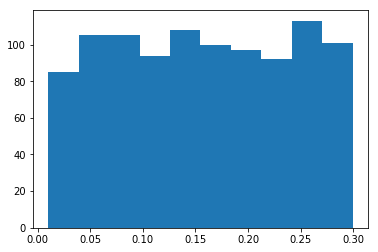

In [36]:
plt.hist(aod)

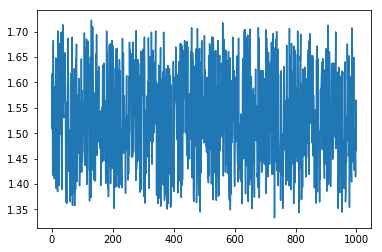

In [37]:
plt.plot(mfr)

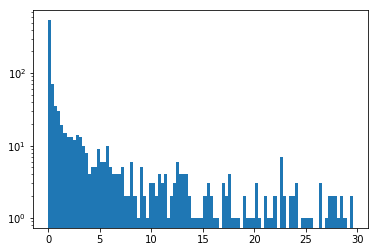

In [55]:
#bins=np.linspace(0.001, 10, 20)
#logbins = np.logspace(np.log10(bins[0]),np.log10(bins[-1]),len(bins))
ax=plt.subplot(111)
ax.set_yscale('log')
a,b,c=plt.hist(chla, bins=100)

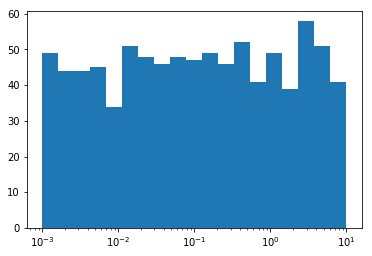

In [38]:
bins=np.linspace(0.001, 10, 20)
logbins = np.logspace(np.log10(bins[0]),np.log10(bins[-1]),len(bins))
ax=plt.subplot(111)
ax.set_xscale('log')
a,b,c=plt.hist(chla, bins=logbins)

In [39]:
vdv[:,1]

array([0.0234706 , 0.00011503, 0.01737968, 0.02325439, 0.02914992])

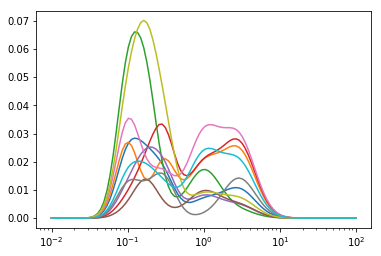

In [40]:
ax=plt.subplot(111)
#ax1=plt.subplot(111)
ax.set_xscale('log')
for i in range(10):
    rvdv=vdv[:,i]
    sv=mvp.dvdlnrfit(rvdv,rv3,n=5)
    #sve=mvp.dvdlnrfit(evdv,rv3,n=6)
    plt.plot(rv3, sv)
#plt.fill_between(rv3, sv-sve, sv+sve, alpha=0.2)

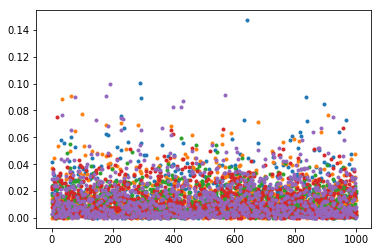

In [41]:
plt.plot(vdv[0,:],'.')
plt.plot(vdv[1,:],'.')
plt.plot(vdv[2,:],'.')
plt.plot(vdv[3,:],'.')
plt.plot(vdv[4,:],'.')

In [42]:
#vdv 0.3 0.1 0.06 0.15 0.5 0.00001

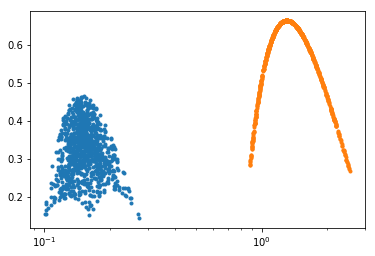

In [43]:
ax=plt.subplot(111)
ax.set_xscale('log')
plt.plot(refff,vefff,'.')
plt.plot(reffc,veffc,'.')

(array([ 85., 105., 105.,  94., 108., 100.,  97.,  92., 113., 101.]),
 array([0.01006209, 0.03900732, 0.06795256, 0.09689779, 0.12584302,
        0.15478825, 0.18373349, 0.21267872, 0.24162395, 0.27056919,
        0.29951442]),
 <a list of 10 Patch objects>)

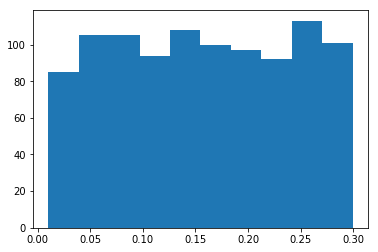

In [44]:
plt.hist(aod)

(array([111.,  89., 105.,  99.,  95., 101., 101., 115.,  86.,  98.]),
 array([0.50962842, 1.45850567, 2.40738292, 3.35626017, 4.30513742,
        5.25401467, 6.20289192, 7.15176917, 8.10064642, 9.04952368,
        9.99840093]),
 <a list of 10 Patch objects>)

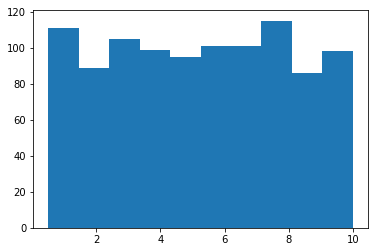

In [45]:
plt.hist(wndspd)

(array([103.,  99., 104.,  98.,  94.,  95., 122.,  97.,  99.,  89.]),
 array([1.21498111e-02, 7.01080485e+00, 1.40094599e+01, 2.10081149e+01,
        2.80067700e+01, 3.50054250e+01, 4.20040800e+01, 4.90027351e+01,
        5.60013901e+01, 6.30000451e+01, 6.99987002e+01]),
 <a list of 10 Patch objects>)

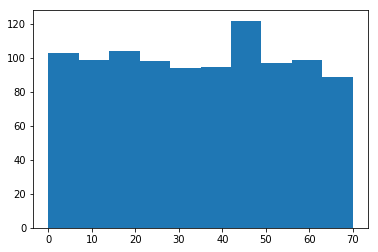

In [46]:
plt.hist(solzen)#, aod, chla

In [47]:
print("%3.2f, %3.2f"% (1.2,2.3))

1.20, 2.30


solzen:0.06, wind:3.05, aod:0.18, chla:0.0019


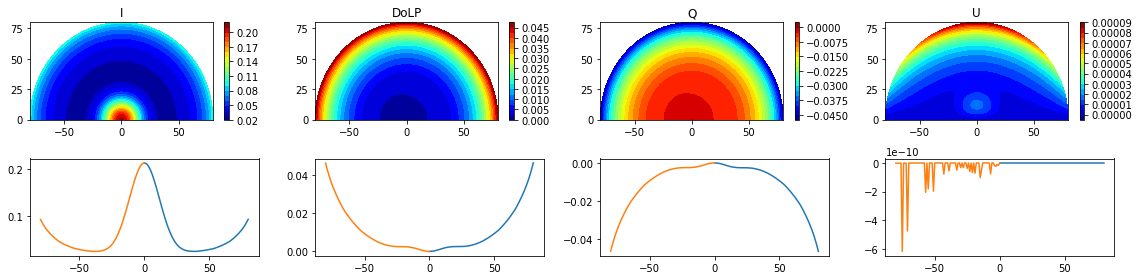

<Figure size 432x288 with 0 Axes>

In [48]:
id1=0
print_par()
stokesv=stokesv2[:,:,:,id1]
outfile='/Users/mgao1/Desktop/stokes.pdf'
plot_stokesv(theta, phi, stokesv, outfile)

solzen:15.07, wind:5.76, aod:0.19, chla:0.0748


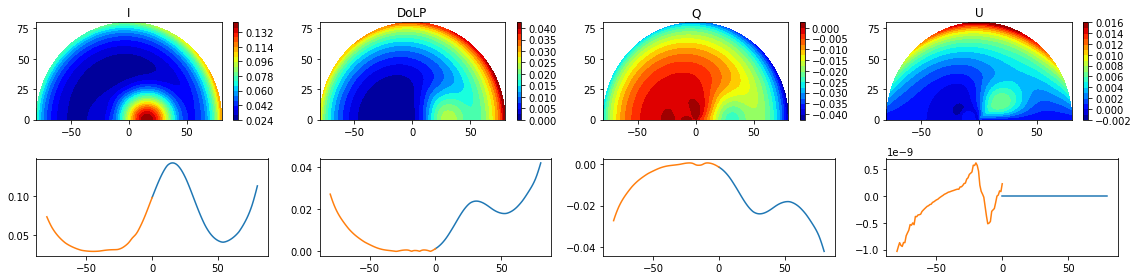

<Figure size 432x288 with 0 Axes>

In [49]:
id1=1
print_par()
stokesv=stokesv2[:,:,:,id1]
outfile='/Users/mgao1/Desktop/stokes.pdf'
plot_stokesv(theta, phi, stokesv, outfile)

solzen:26.28, wind:6.35, aod:0.27, chla:3.4420


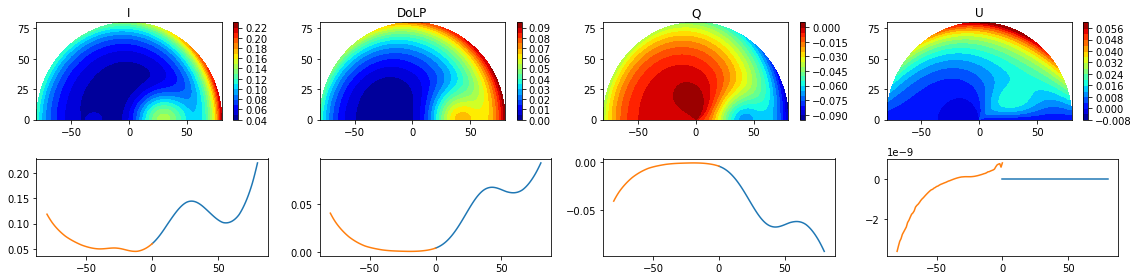

<Figure size 432x288 with 0 Axes>

In [50]:
id1=2
print_par()
stokesv=stokesv2[:,:,:,id1]
outfile='/Users/mgao1/Desktop/stokes.pdf'
plot_stokesv(theta, phi, stokesv, outfile)

solzen:1.09, wind:5.61, aod:0.10, chla:0.0027


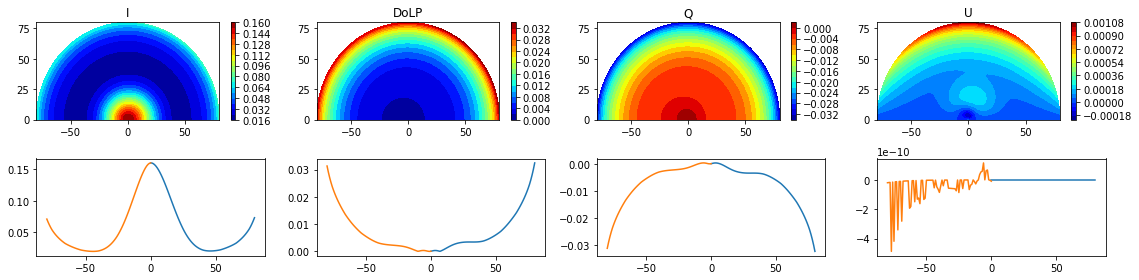

<Figure size 432x288 with 0 Axes>

In [51]:
id1=5
print_par()
stokesv=stokesv2[:,:,:,id1]
outfile='/Users/mgao1/Desktop/stokes.pdf'
plot_stokesv(theta, phi, stokesv, outfile)

solzen:45.41, wind:5.45, aod:0.14, chla:21.8959


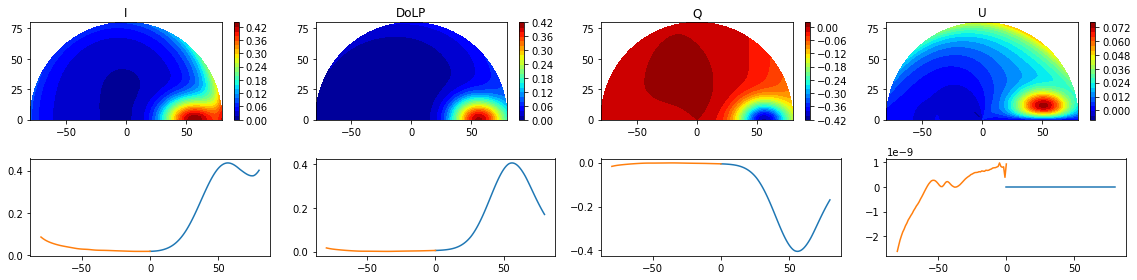

<Figure size 432x288 with 0 Axes>

In [52]:
id1=9
print_par()
stokesv=stokesv2[:,:,:,id1]
outfile='/Users/mgao1/Desktop/stokes.pdf'
plot_stokesv(theta, phi, stokesv, outfile)

## functions